In [1]:
import numpy as np
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline

In [2]:
data = sio.loadmat('ex8_movies.mat')
Y = data['Y']
R = data['R']
print "Average rating for movie 1:"
print Y[0,np.where(R[0,:])].mean()

Average rating for movie 1:
3.87831858407


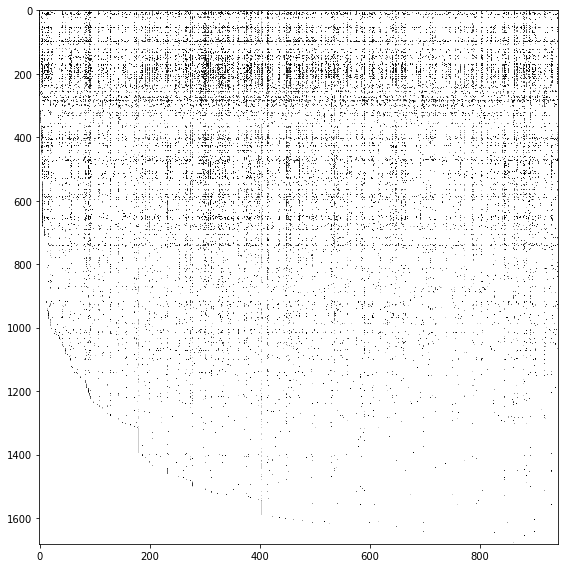

In [3]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(Y,cmap='gray_r',aspect='auto') 
#plt.imshow(Y,aspect='auto')
fig.tight_layout()

In [4]:
data = sio.loadmat('ex8_movieParams.mat')
X = data['X']
Theta = data['Theta']

In [5]:
def cofiCostFunc(params,Y,R,num_users,num_movies,num_features,lam):
    X = np.reshape(params[:num_movies*num_features],(num_movies,num_features))
    Theta = np.reshape(params[num_movies*num_features:],(num_users,num_features))
    
    J = (1/2.0)*np.sum(((X.dot(Theta.T) - Y)*R)**2) + (lam/2.0)*np.sum(X**2) + (lam/2.0)*np.sum(Theta**2)
    X_grad = ((X.dot(Theta.T) - Y)*R).dot(Theta) + lam*X
    Theta_grad = ((X.dot(Theta.T) - Y)*R).T.dot(X) + lam*Theta
    grad = np.concatenate((X_grad.ravel(),Theta_grad.ravel()))
    return J,grad

In [6]:
num_users = 4
num_movies = 5
num_features = 3
X = X[:num_movies, :num_features]
Theta = Theta[:num_users, :num_features]
Y = Y[:num_movies, :num_users]
R = R[:num_movies, :num_users]

J,grad = cofiCostFunc(np.concatenate((X.ravel(),Theta.ravel())),Y,R,num_users,num_movies,num_features,0)
print "Without Regularization:"
print "Cost " + str(J)
print "Gradients " +str(grad)

J,grad = cofiCostFunc(np.concatenate((X.ravel(),Theta.ravel())),Y,R,num_users,num_movies,num_features,1.5)
print "With Regularization: (lam = 1.5)"
print "Cost " + str(J)
print "Gradients " +str(grad)

Without Regularization:
Cost 22.2246037257
Gradients [ -2.52899165   7.57570308  -1.89979026  -0.56819597   3.35265031
  -0.52339845  -0.83240713   4.91163297  -0.76677878  -0.38358278
   2.26333698  -0.35334048  -0.80378006   4.74271842  -0.74040871
 -10.5680202    4.62776019  -7.16004443  -3.05099006   1.16441367
  -3.47410789   0.           0.           0.           0.           0.           0.        ]
With Regularization: (lam = 1.5)
Cost 31.3440562443
Gradients [ -0.95596339   6.97535514  -0.10861109   0.60308088   2.77421145
   0.25839822   0.12985616   4.0898522   -0.89247334   0.29684395
   1.06300933   0.66738144   0.60252677   4.90185327  -0.19747928
 -10.13985478   2.10136256  -6.76563628  -2.29347024   0.48244098
  -2.99791422  -0.64787484  -0.71820673   1.27006666   1.09289758
  -0.40784086   0.49026541]


In [7]:
with open('movie_ids.txt') as f:
    movieList = f.read().splitlines() #f.readlines() show '\n' at the end of the movie names
    
movieList = [' '.join(movie.split()[1:]) for movie in movieList]

myRatings = np.zeros(len(movieList))
myRatings[0] = 4
myRatings[97] = 2
myRatings[6] = 3
myRatings[11] = 5
myRatings[53] = 4
myRatings[63] = 5
myRatings[65] = 3
myRatings[68] = 5
myRatings[182] = 4
myRatings[225] = 5
myRatings[354] = 5

for i in xrange(len(myRatings)):
    if myRatings[i] > 0:
        print "Rated "+str(myRatings[i])+" for "+ str(movieList[i])


Rated 4.0 for Toy Story (1995)
Rated 3.0 for Twelve Monkeys (1995)
Rated 5.0 for Usual Suspects, The (1995)
Rated 4.0 for Outbreak (1995)
Rated 5.0 for Shawshank Redemption, The (1994)
Rated 3.0 for While You Were Sleeping (1995)
Rated 5.0 for Forrest Gump (1994)
Rated 2.0 for Silence of the Lambs, The (1991)
Rated 4.0 for Alien (1979)
Rated 5.0 for Die Hard 2 (1990)
Rated 5.0 for Sphere (1998)


In [8]:
data = sio.loadmat('ex8_movies.mat')
Y = data['Y']
R = data['R']
Y = np.column_stack((Y,myRatings))
R = np.column_stack((R, myRatings != 0))
num_users = Y.shape[1]
num_movies = Y.shape[0]
num_features = 10
lam = 10

X = np.random.randn(num_movies,num_features)
Theta = np.random.randn(num_users,num_features)
params = np.concatenate((X.ravel(),Theta.ravel()))

In [9]:
def normalizeRatings(Y,R):
    num_ratings = np.sum(R,1)
    Ymean = np.sum(Y*R,1)/num_ratings
    Ynorm = Y - Ymean.reshape((Y.shape[0],1)) 
    # this even subracts the mean from 0 entries in Y, which correspond to unrated. In my code cost calculation I multiply the error matrix with R, so what ever value Ynorm has at the unrated entries will not matter.
    Ynorm[np.where(R==0)] = 0  # To be on the safer side we can set to unrated entries back to zero
    return Ynorm,Ymean

Ynorm,Ymean = normalizeRatings(Y,R)
print Y[0,:10]
print Ynorm[0,:10]

[ 5.  4.  0.  0.  4.  4.  0.  0.  0.  4.]
[ 1.1214128  0.1214128  0.         0.         0.1214128  0.1214128  0.         0.
  0.         0.1214128]


The line (Ynorm = Y - Ymean) actually subracts the mean from 0 entries in Y, which correspond to unrated, i.e R(i,j)=0. In my  cost calculation code I multiply the error matrix with R, so whatever value Ynorm has at the unrated entries will not matter.

In [10]:
fmin = minimize(fun=cofiCostFunc,x0=params,args=(Ynorm,R,num_users,num_movies,num_features,lam),method='CG',jac=True,options={'maxiter': 100})
print fmin

     fun: 38952.23247140327
     jac: array([ -5.81716501e-02,  -1.28144256e-02,  -3.43959244e-02, ...,
         7.41737267e-07,  -2.97652194e-03,   5.93667682e-04])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 145
     nit: 100
    njev: 145
  status: 1
 success: False
       x: array([-0.03743688,  0.60938744,  0.90899295, ...,  0.0364137 ,
        0.06736721,  0.20064677])


In [11]:
X = np.reshape(fmin.x[:num_movies*num_features],(num_movies,num_features))
Theta = np.reshape(fmin.x[num_movies*num_features:],(num_users,num_features))

p = X.dot(Theta.T)
my_predictions = p[:,-1] + Ymean

print "Top recommendations for you: "
sorted_idx = np.argsort(-my_predictions)
for i in xrange(10):
    print "Predicting rating "+str(my_predictions[sorted_idx[i]])+" for movie "+ str(movieList[sorted_idx[i]])

Top recommendations for you: 
Predicting rating 5.00000012197 for movie Prefontaine (1997)
Predicting rating 5.00000007236 for movie Saint of Fort Washington, The (1993)
Predicting rating 5.00000007221 for movie Santa with Muscles (1996)
Predicting rating 5.00000002263 for movie Star Kid (1997)
Predicting rating 4.99999998382 for movie Great Day in Harlem, A (1994)
Predicting rating 4.99999997596 for movie Someone Else's America (1995)
Predicting rating 4.99999996848 for movie Entertaining Angels: The Dorothy Day Story (1996)
Predicting rating 4.99999991335 for movie They Made Me a Criminal (1939)
Predicting rating 4.99999975469 for movie Marlene Dietrich: Shadow and Light (1996)
Predicting rating 4.99999963422 for movie Aiqing wansui (1994)
